In [72]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

## Train Dataset

In [73]:
dataset = MNIST(root = '.' , download = True , transform = ToTensor())

In [74]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [75]:
dataset[0][0].size()

torch.Size([1, 28, 28])

In [76]:
import matplotlib.pyplot as plt

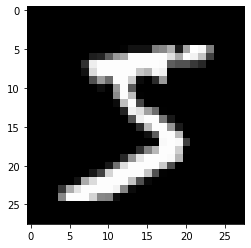

In [77]:
plt.imshow(dataset[0][0][0,:,:] , cmap = 'gray')

## Loading the Dataset

In [78]:
from torch.utils.data.dataloader import DataLoader

In [79]:
batch_size = 100

In [80]:
train_dl = DataLoader(dataset, 
                      batch_size, 
                      shuffle = True)

## RNN Model

In [81]:
class RNN(nn.Module):
    def __init__(self,input_size ,seq_len , hidden_size ,num_layers , output_size):
        super(RNN , self).__init__()
        self.input_size =  input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.seq_len = seq_len
        
        # (batch , seq , features)
        self.rnn = nn.RNN(input_size , hidden_size , num_layers , nonlinearity = 'relu' , batch_first = True)
        
        self.linear1 = nn.Linear(hidden_size , output_size)
        
    
    def forward(self , batch):
        
        batch = batch.view(-1,self.input_size ,self.seq_len)
        
        out,_ = self.rnn(batch)
        out = out[:,-1,:] # taking only the last output of RNN model through a Linear layer
        out = self.linear1(out)
        
        return out

## Structure

![title](Images/RNN.png)

In [82]:
input_size,seq , hidden_size ,num_layers , output_size = 28,28,101,1,10

In [83]:
model = RNN(input_size ,seq , hidden_size ,num_layers , output_size)

In [84]:
for image,label in train_dl:
    pred = model(image)
    print(pred.shape)

    break

torch.Size([100, 10])


## Loss Fn

In [85]:
loss_fn = nn.CrossEntropyLoss()

## Initial Loss

In [86]:
for image,label in train_dl:
    pred = model(image)
    loss = loss_fn(pred , label)
    print(loss.item())

    break

2.312309503555298


## Optimizer

In [87]:
opt = torch.optim.SGD(model.parameters() , lr = 0.01)

## Training

In [88]:
iterations = []
loss_set = []
for i in range(0,30):
    for image,label in train_dl:
        pred = model(image)
        loss = loss_fn(pred , label)
        loss.backward()
        with torch.no_grad():
            opt.step()
            opt.zero_grad()
            
    iterations.append(i)
    loss_set.append(loss)
    
    print(f'Iteration {i} , Loss {loss}')

Iteration 0 , Loss 2.288759469985962
Iteration 1 , Loss 2.2748847007751465
Iteration 2 , Loss 1.6014771461486816
Iteration 3 , Loss 1.3133065700531006
Iteration 4 , Loss 0.9248207807540894
Iteration 5 , Loss 0.5465739965438843
Iteration 6 , Loss 0.4069939851760864
Iteration 7 , Loss 0.38453811407089233
Iteration 8 , Loss 0.2782380282878876
Iteration 9 , Loss 0.2349889725446701
Iteration 10 , Loss 0.18652096390724182
Iteration 11 , Loss 0.22368861734867096
Iteration 12 , Loss 0.2226027101278305
Iteration 13 , Loss 0.15620540082454681
Iteration 14 , Loss 0.21518373489379883
Iteration 15 , Loss 0.12727642059326172
Iteration 16 , Loss 0.11896321177482605
Iteration 17 , Loss 0.15001772344112396
Iteration 18 , Loss 0.21237967908382416
Iteration 19 , Loss 0.12714368104934692
Iteration 20 , Loss 0.0698949322104454
Iteration 21 , Loss 0.1106388121843338
Iteration 22 , Loss 0.17363308370113373
Iteration 23 , Loss 0.2060067057609558
Iteration 24 , Loss 0.05756727606058121
Iteration 25 , Loss 0.10

Text(0.5, 0, 'Iteration')

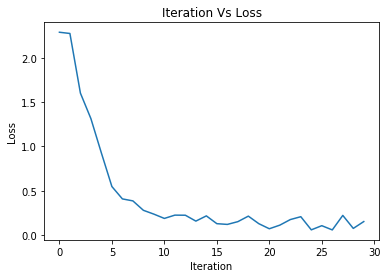

In [89]:
plt.plot(iterations , loss_set)
plt.title('Iteration Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')

## Test Dataset

In [90]:
test_dataset = MNIST(root = '.' , train = False , transform = ToTensor())

In [91]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()

## Loading Test Dataset

In [92]:
test_dl  = DataLoader(test_dataset , batch_size , shuffle = True , )

## Accuracy

In [93]:
correct = 0
total = 0
for test,label in test_dl:
    pred = model(test)
    for i in range(len(pred)):
        _ , prediction = torch.max(pred[i] , dim = 0)
        if prediction.item() == label[i].item():
            correct += 1
        total += 1

In [94]:
print(f'Accuracy is {round((correct/total)*100)}%')

Accuracy is 97%
